In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data

- `timestamp`: The timestamp index representing the minute associated with each row.

- `bid_qty`: The total quantity buyers are willing to purchase at the best (highest) bid price at the given timestamp.
- `ask_qty`: The total quantity sellers are offering to sell at the best (lowest) ask price at the given timestamp.

- `buy_qty`: The total executed buy quantity during the minute.
- `sell_qty`: The total executed sell quantity during the minute.

- `volume`: The total traded volume during the minute.

- `X_{1,...,890}`: A set of anonymized market features derived from proprietary data sources.

- `label`: The target variable representing the anonymized market price movement to be predicted.

## Train

- Dimension: 525887 × 896

In [21]:
train_raw = pd.read_parquet('./data/train.parquet').astype('float32')
train_X_raw = train_raw.drop(columns=['label'])
train_y = train_raw['label']
train_X_raw

,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X881,X882,X883,X884,X885,X886,X887,X888,X889,X890
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-01 00:00:00,15.283000,8.425000,176.404999,44.984001,221.389008,0.121263,-0.417690,0.005399,0.125949,0.058359,...,1.000007,1.925423,1.847943,0.005676,0.190791,0.369691,0.377630,0.210153,0.159183,0.530636
2023-03-01 00:01:00,38.590000,2.336000,525.846008,321.950012,847.796021,0.302841,-0.049576,0.356667,0.481087,0.237954,...,1.003153,1.928569,1.849468,0.005227,0.184660,0.363642,0.374515,0.209573,0.158963,0.530269
2023-03-01 00:02:00,0.442000,60.250000,159.227005,136.369003,295.596008,0.167462,-0.291212,0.083138,0.206881,0.101727,...,1.002501,1.928047,1.849282,0.004796,0.178719,0.357689,0.371424,0.208993,0.158744,0.529901
2023-03-01 00:03:00,4.865000,21.016001,335.742004,124.962997,460.704987,0.072944,-0.436590,-0.102483,0.017551,0.007149,...,1.002985,1.928621,1.849608,0.004398,0.172967,0.351832,0.368358,0.208416,0.158524,0.529534
2023-03-01 00:04:00,27.158001,3.451000,98.411003,44.407001,142.817993,0.173820,-0.213489,0.096067,0.215709,0.107133,...,1.001286,1.927084,1.848950,0.004008,0.167391,0.346066,0.365314,0.207839,0.158304,0.529167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29 23:55:00,4.163000,6.805000,39.036999,55.351002,94.388000,0.020155,0.076565,0.228994,0.288856,0.151634,...,1.450851,3.219345,3.340686,0.008679,0.224656,0.401595,0.393726,0.212651,0.136494,0.243172
2024-02-29 23:56:00,2.290000,4.058000,110.200996,67.170998,177.371994,0.016262,0.062527,0.214072,0.276463,0.146520,...,1.448602,3.216719,3.339353,0.007928,0.217422,0.395019,0.390476,0.212063,0.136305,0.243004
2024-02-29 23:57:00,5.237000,3.640000,70.499001,30.753000,101.251999,0.045407,0.109834,0.263577,0.329266,0.174214,...,1.445661,3.213444,3.337740,0.007243,0.210422,0.388549,0.387252,0.211477,0.136117,0.242836


## Test
- Dimension: 538150 rows × 895 columns

In [8]:
# Test

test = pd.read_parquet('./data/test.parquet').astype('float32')
test_X = test.drop(columns=['label'])
test_y = test['label']
test_X

,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X881,X882,X883,X884,X885,X886,X887,X888,X889,X890
ID,,,,,,,,,,,,,,,,,,,,,
1,0.114,12.121,10.587000,10.971000,21.558001,-0.732818,0.512331,-0.041982,-0.598260,-0.517646,...,0.433289,1.014336,1.367567,1.584126,1.584126,1.584126,1.584125,1.567979,1.426368,2.192682
2,2.426,2.962,136.240997,12.304000,148.544998,-0.337995,-0.412176,-0.259468,-0.334809,-0.247443,...,0.725448,1.748939,1.848177,0.000131,0.000323,0.001746,0.007319,0.050925,0.142206,0.739759
3,1.085,2.343,23.389999,57.171001,80.560997,0.111249,0.458221,0.466916,0.574081,0.324722,...,0.743693,1.704680,1.772028,0.000550,0.003597,0.009265,0.019948,0.072535,0.169672,0.807862
4,14.793,1.117,116.517998,13.082000,129.600006,-0.149399,-0.640638,-0.873778,-1.026144,-0.508816,...,0.451041,0.930946,1.037839,1.382037,1.382037,1.382037,1.382037,1.381752,1.363445,2.465509
5,0.033,14.178,43.799999,49.835999,93.636002,-0.694662,0.611254,0.067671,-0.531632,-0.581450,...,0.602724,1.080267,1.141878,0.000363,0.012718,0.137533,0.464112,1.050577,1.268567,2.499015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538146,8.599,2.327,74.570000,42.691002,117.261002,0.198687,0.135445,0.505441,0.753963,0.410612,...,1.023725,2.185495,2.257754,1.239053,0.646543,0.368060,0.196958,0.074014,0.059849,0.245092
538147,5.027,7.296,45.056999,19.150999,64.208000,-0.451693,-0.433553,-0.232846,-0.190379,-0.215448,...,0.901631,1.776626,1.724998,0.000021,0.000027,0.000029,0.000083,0.049487,0.274900,1.162933
538148,12.780,1.054,23.926001,38.283001,62.209000,0.574457,0.482240,1.076440,1.363869,0.779195,...,0.685204,1.340804,1.420642,0.000600,0.005740,0.089671,0.374153,0.977561,1.223688,2.454477


# Preprocessing

In [116]:
def get_cols_inf(df):
    """
    Returns a list of column names that contain positive or negative infinity.
    """
    return df.columns[np.isinf(df.values).any(axis=0)].tolist()

def get_cols_zerostd(df):
    """
    Returns a list of column names with zero standard deviation (excluding NaNs).
    """
    nunique_non_nan = df.nunique(dropna=True)
    return nunique_non_nan[nunique_non_nan <= 1].index.tolist()

def get_nan_columns(df):
    """
    Returns a list of column names that contain NaN values.
    """
    return df.columns[df.isna().any()].tolist()

def preprocess_train(train):
    df = train.copy()

    # Identify once at the start
    cols_inf = get_cols_inf(df)
    print("Columns with infinite values:", cols_inf)
    cols_nan = get_nan_columns(df)
    print("Columns with NaN values:", cols_nan)
    cols_zerostd = get_cols_zerostd(df)
    print("Columns with zero standard deviation:", cols_zerostd)
    # Drop all at once
    cols_to_drop = set(cols_inf) | set(cols_nan) | set(cols_zerostd)
    df = df.drop(columns=cols_to_drop)

    return df

train_X_processed = preprocess_train(train=train_X_raw)
train_X_processed

Columns with infinite values: ['X697', 'X698', 'X699', 'X700', 'X701', 'X702', 'X703', 'X704', 'X705', 'X706', 'X707', 'X708', 'X709', 'X710', 'X711', 'X712', 'X713', 'X714', 'X715', 'X716', 'X717']
Columns with NaN values: []
Columns with zero standard deviation: ['X697', 'X698', 'X699', 'X700', 'X701', 'X702', 'X703', 'X704', 'X705', 'X706', 'X707', 'X708', 'X709', 'X710', 'X711', 'X712', 'X713', 'X714', 'X715', 'X716', 'X717', 'X864', 'X867', 'X869', 'X870', 'X871', 'X872']


,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X881,X882,X883,X884,X885,X886,X887,X888,X889,X890
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-01 00:00:00,15.283000,8.425000,176.404999,44.984001,221.389008,0.121263,-0.417690,0.005399,0.125949,0.058359,...,1.000007,1.925423,1.847943,0.005676,0.190791,0.369691,0.377630,0.210153,0.159183,0.530636
2023-03-01 00:01:00,38.590000,2.336000,525.846008,321.950012,847.796021,0.302841,-0.049576,0.356667,0.481087,0.237954,...,1.003153,1.928569,1.849468,0.005227,0.184660,0.363642,0.374515,0.209573,0.158963,0.530269
2023-03-01 00:02:00,0.442000,60.250000,159.227005,136.369003,295.596008,0.167462,-0.291212,0.083138,0.206881,0.101727,...,1.002501,1.928047,1.849282,0.004796,0.178719,0.357689,0.371424,0.208993,0.158744,0.529901
2023-03-01 00:03:00,4.865000,21.016001,335.742004,124.962997,460.704987,0.072944,-0.436590,-0.102483,0.017551,0.007149,...,1.002985,1.928621,1.849608,0.004398,0.172967,0.351832,0.368358,0.208416,0.158524,0.529534
2023-03-01 00:04:00,27.158001,3.451000,98.411003,44.407001,142.817993,0.173820,-0.213489,0.096067,0.215709,0.107133,...,1.001286,1.927084,1.848950,0.004008,0.167391,0.346066,0.365314,0.207839,0.158304,0.529167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29 23:55:00,4.163000,6.805000,39.036999,55.351002,94.388000,0.020155,0.076565,0.228994,0.288856,0.151634,...,1.450851,3.219345,3.340686,0.008679,0.224656,0.401595,0.393726,0.212651,0.136494,0.243172
2024-02-29 23:56:00,2.290000,4.058000,110.200996,67.170998,177.371994,0.016262,0.062527,0.214072,0.276463,0.146520,...,1.448602,3.216719,3.339353,0.007928,0.217422,0.395019,0.390476,0.212063,0.136305,0.243004
2024-02-29 23:57:00,5.237000,3.640000,70.499001,30.753000,101.251999,0.045407,0.109834,0.263577,0.329266,0.174214,...,1.445661,3.213444,3.337740,0.007243,0.210422,0.388549,0.387252,0.211477,0.136117,0.242836


# EDA

Key Findings
- ['X864', 'X867', 'X869', 'X870', 'X871', 'X872'] have zero variance
- Since bid_qty / ask_qty / buy_qty / sell_qty is more important as a ratio of the opposite, we build ratio and delta as the features. This allows us to express the relationship between the orderbook and actual trades in a much cleaner way.
- There appears to be extremely correlated variables, which should be removed depending on the model. In the individual model building process, we then focus on how to approach the features based on the underlying model itself.

In [74]:
X = train_X_processed.values  # Convert to NumPy array
X_centered = X - X.mean(axis=0)
correlation_matrix = (X_centered.T @ X_centered) / (X.shape[0] - 1)
std_dev = X.std(axis=0, ddof=1)
correlation_matrix /= std_dev[:, None]
correlation_matrix /= std_dev[None, :]

<Axes: >

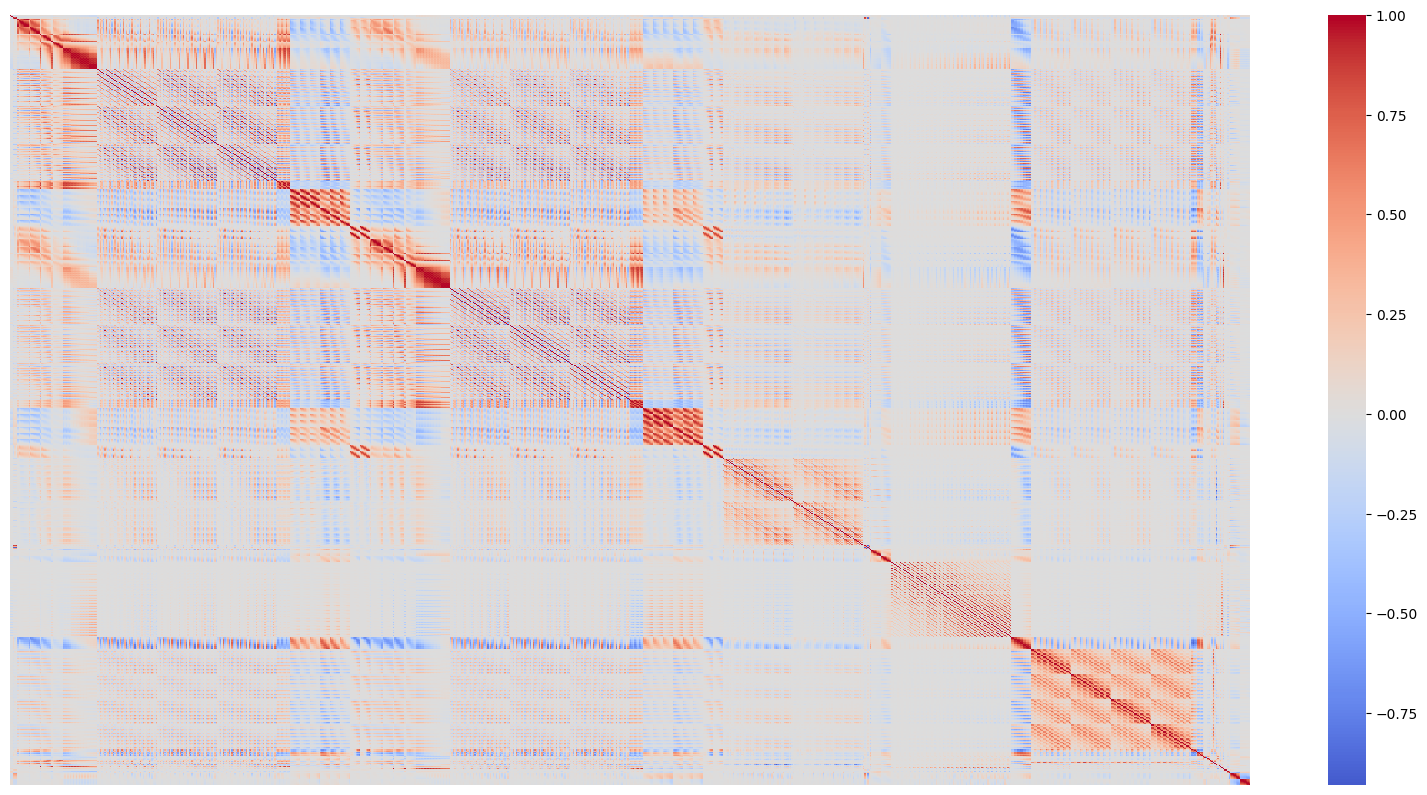

In [81]:
correlation_df = pd.DataFrame(correlation_matrix, index=train_X_processed.columns, columns=train_X_processed.columns)
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_df, cmap='coolwarm', center=0, xticklabels=False, yticklabels=False)  # limit to 50×50 for visibility

# Feature Enginerring

In [103]:
# Does Bid Ask Ratio Affect Buy/Sell Ratio?
train_X_filtered = train_X_processed[['bid_qty', 'ask_qty', 'buy_qty', 'sell_qty']].copy()

train_X_filtered.loc[:, 'bidask_ratio'] = train_X_filtered['bid_qty'] / train_X_filtered['ask_qty']
train_X_filtered.loc[:, 'buysell_ratio'] = train_X_filtered['buy_qty'] / train_X_filtered['sell_qty']
train_X_filtered.loc[:, 'buysell_ratio_shift1'] = train_X_filtered['buysell_ratio'].shift(-1)

train_X_filtered.loc[:, 'bidask_delta'] = train_X_filtered['bid_qty'] - train_X_filtered['ask_qty']
train_X_filtered.loc[:, 'buysell_delta'] = train_X_filtered['buy_qty'] - train_X_filtered['sell_qty']
train_X_filtered

,bid_qty,ask_qty,buy_qty,sell_qty,bidask_ratio,buysell_ratio,buysell_ratio_shift1,bidask_delta,buysell_delta
timestamp,,,,,,,,,
2023-03-01 00:00:00,15.283000,8.425000,176.404999,44.984001,1.814006,3.921505,1.633316,6.858000,131.420990
2023-03-01 00:01:00,38.590000,2.336000,525.846008,321.950012,16.519691,1.633316,1.167619,36.254002,203.895996
2023-03-01 00:02:00,0.442000,60.250000,159.227005,136.369003,0.007336,1.167619,2.686731,-59.807999,22.858002
2023-03-01 00:03:00,4.865000,21.016001,335.742004,124.962997,0.231490,2.686731,2.216115,-16.151001,210.779007
2023-03-01 00:04:00,27.158001,3.451000,98.411003,44.407001,7.869603,2.216115,3.174338,23.707001,54.004002
...,...,...,...,...,...,...,...,...,...
2024-02-29 23:55:00,4.163000,6.805000,39.036999,55.351002,0.611756,0.705263,1.640604,-2.642000,-16.314003
2024-02-29 23:56:00,2.290000,4.058000,110.200996,67.170998,0.564317,1.640604,2.292427,-1.768000,43.029999
2024-02-29 23:57:00,5.237000,3.640000,70.499001,30.753000,1.438736,2.292427,0.428489,1.597000,39.746002


<Axes: xlabel='bidask_ratio', ylabel='buysell_ratio_shift1'>

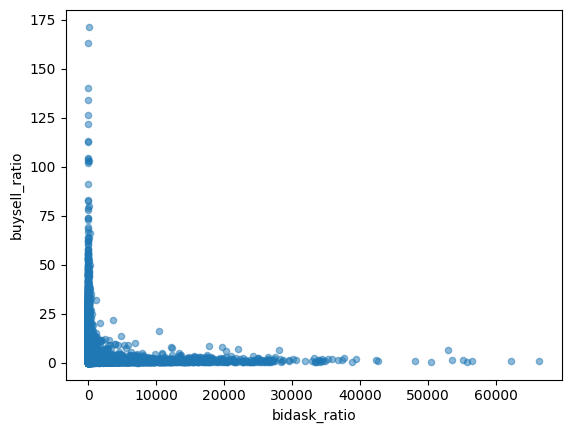

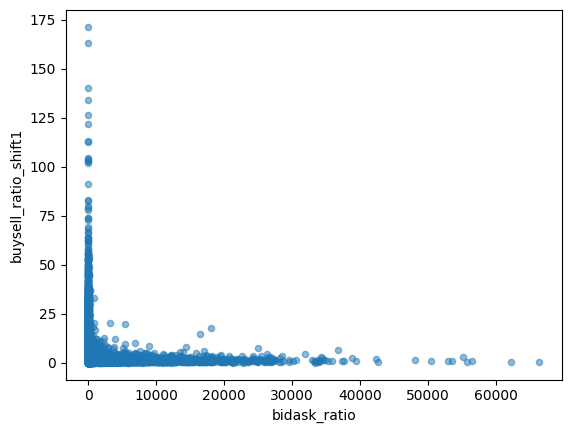

In [101]:
# Hypothesis: Current BidAsk Ratio will affect Next Buy/Sell Ratio
train_X_filtered[['bidask_ratio', 'buysell_ratio']].plot.scatter(x='bidask_ratio', y='buysell_ratio', alpha=0.5)
train_X_filtered[['bidask_ratio', 'buysell_ratio_shift1']].plot.scatter(x='bidask_ratio', y='buysell_ratio_shift1', alpha=0.5)

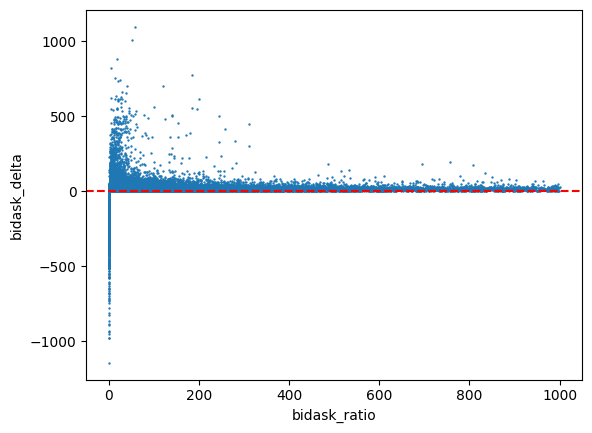

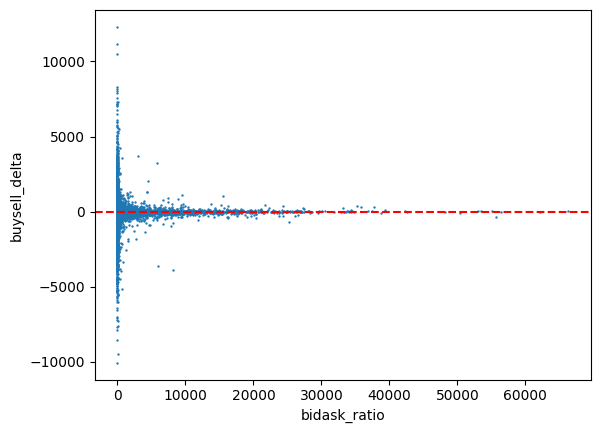

In [112]:
# Ratio vs Delta
train_X_filtered[train_X_filtered['bidask_ratio'] <= 1000][['bidask_ratio', 'bidask_delta']].plot.scatter(x='bidask_ratio', y='bidask_delta', alpha=1, s = 0.5)
plt.axhline(0, color='red', linestyle='--')
train_X_filtered[['bidask_ratio', 'buysell_delta']].plot.scatter(x='bidask_ratio', y='buysell_delta', alpha=1, s = 0.5)
plt.axhline(0, color='red', linestyle='--')

In [ ]:
train_X_filtered[['bid_qty', 'ask_qty', 'buy_qty', 'sell_qty', 'bidask_ratio', 'bidask_delta', 'buysell_ratio', 'buysell_delta', 'buysell_ratio_shift1', ]].corr().style.background_gradient(cmap='coolwarm')



,bid_qty,ask_qty,buy_qty,sell_qty,bidask_ratio,bidask_delta,buysell_ratio,buysell_delta,buysell_ratio_shift1
bid_qty,1.000000,0.015471,-0.060813,-0.064913,0.046758,0.695999,0.125710,0.007690,0.078363
ask_qty,0.015471,1.000000,-0.062721,-0.056430,-0.040290,-0.707189,-0.021802,-0.009663,0.021869
buy_qty,-0.060813,-0.062721,1.000000,0.819819,0.010070,0.002040,0.029906,0.287669,-0.047772
sell_qty,-0.064913,-0.056430,0.819819,1.000000,0.011129,-0.005376,-0.103165,-0.312582,-0.059766
bidask_ratio,0.046758,-0.040290,0.010070,0.011129,1.000000,0.061997,-0.002503,-0.001908,-0.001101
bidask_delta,0.695999,-0.707189,0.002040,-0.005376,0.061997,1.000000,0.104546,0.012377,0.039706
buysell_ratio,0.125710,-0.021802,0.029906,-0.103165,-0.002503,0.104546,1.000000,0.222155,0.128384
buysell_delta,0.007690,-0.009663,0.287669,-0.312582,-0.001908,0.012377,0.222155,1.000000,0.020716
buysell_ratio_shift1,0.078363,0.021869,-0.047772,-0.059766,-0.001101,0.039706,0.128384,0.020716,1.000000
